In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#load data and take a random sample
flights = pd.read_csv('DelayedFlights.csv')
flights = flights.sample(n=10000, random_state=1)

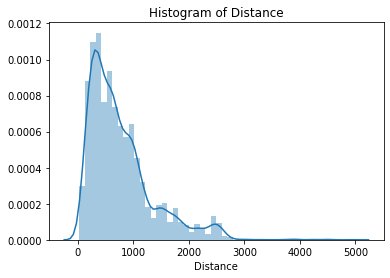

In [61]:
#histogram
sns.distplot(flights["Distance"])
plt.title("Histogram of Distance")
plt.show()

The histogram does a good job of showing where the majority of the data is concentrated. It does not do a good job of showing where the outliers (in this case, flights with long distances) are located.

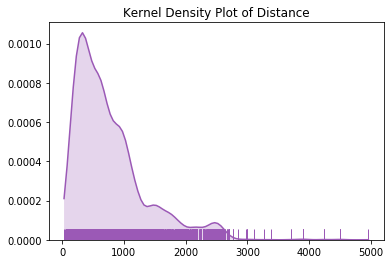

In [62]:
#kernel density plot
sns.kdeplot(flights["Distance"], shade=True, cut = 0, legend = False, color = "#9b59b6")
sns.rugplot(flights["Distance"], color = "#9b59b6")
plt.title("Kernel Density Plot of Distance")
plt.show()

Like the histogram, this chart makes it easy to see where the majority of the data falls. Adding the rugplot makes it more clear where the outliers are located.

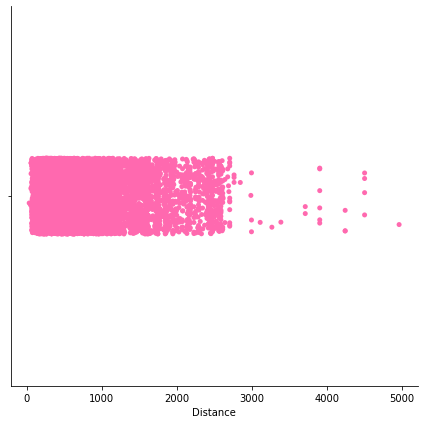

In [56]:
#scatterplot
sns.catplot(x="Distance", data=flights,
                   height=6, color = "#ff69af", ci=95)
plt.show()

A scatterplot for one variable is not particularly useful. We can still see that most of the data is located at distances less than 1000, but it is unclear how much data is concentrated where.

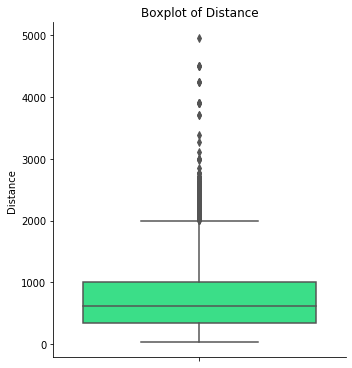

In [64]:
#boxplot
sns.catplot(y="Distance", kind="box", data=flights, color = "#20f986")
plt.title('Boxplot of Distance')
plt.show()

The boxplot clearly shows that most of the data points are concentrated at distances less than 1000. It gives some ideas of where outliers are located, but it does not give as clear of a representation of where the data is located as the histogram or the kernel density plot.

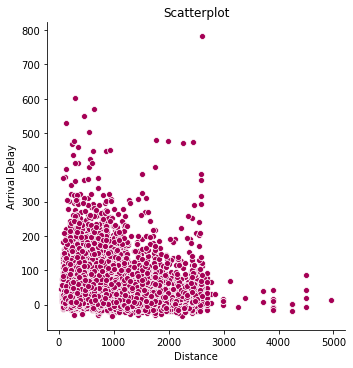

In [68]:
#scatterplot of Distance vs Arrival Delay
sns.relplot(x="Distance", y="ArrDelay", color = "#a50055",
            data=flights)
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.title("Scatterplot")
plt.show()

The scatterplot clearly shows that most of the data is concentrated in the lower lefthand corner of the chart, but it is unclear exactly how much of the data is located in that area and where. This plot shows the outliers most clearly.

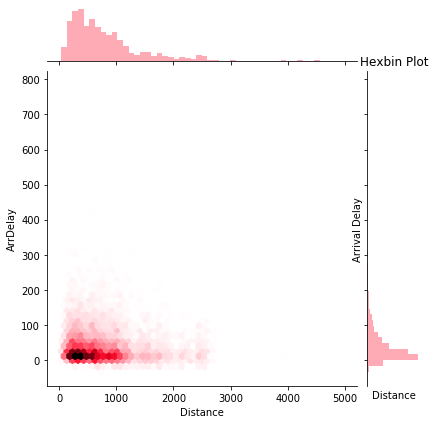

In [69]:
#hexbin plot of Distance vs. Arrival Delay
sns.jointplot(x='Distance', y='ArrDelay', kind="hex", color="#fe2f4a", data = flights)
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.title("Hexbin Plot")
plt.show()

This plot clearly shows that most flights have a delay close to zero and a distance of a few hundred miles. You cannot see the flights with long distances or long arrival times at all in this chart.

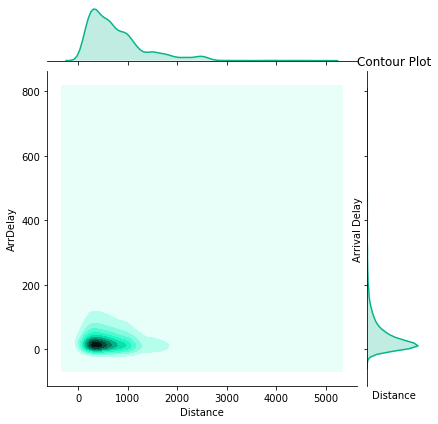

In [72]:
#contour plot of Distance vs Arrival Delay
sns.jointplot(x="Distance", y="ArrDelay", data=flights, kind="kde", color = '#06b48b')
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.title("Contour Plot")
plt.show()

This chart is very similar to the hexbin chart. The way the entire chart is shaded makes it somewhat more clear that there are outliers, but it is not at all clear where they are located.

In [90]:
#limit to top 5 carriers
carriers = pd.DataFrame(flights.groupby('UniqueCarrier').size())
carriers = carriers.sort_values(0, ascending = False)
carriers.head(5)
top_flights = flights.loc[flights['UniqueCarrier'].isin(['WN','AA', 'UA', 'MQ', 'OO'])]

For the purposes of this assignment, I displayed the data only for the top 5 carriers in the sample to make the charts easier to read.

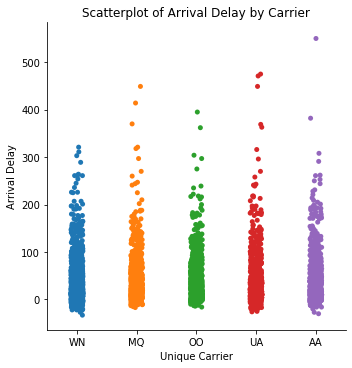

In [95]:
#scatterplot
sns.catplot(x="UniqueCarrier", y="ArrDelay", data=top_flights)
plt.xlabel("Unique Carrier")
plt.ylabel('Arrival Delay')
plt.title("Scatterplot of Arrival Delay by Carrier")
plt.show()

On the scatterplot, you can see that the majority of the data is concentrated near the bottom of the chart (low delays). The scatterplot makes it clear where the outliers are. For example, AA had a flight with a delay of over 500 minutes.

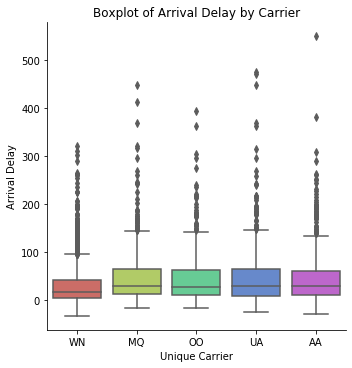

In [107]:
#boxplot
sns.catplot(x="UniqueCarrier", y="ArrDelay", kind="box", data=top_flights, palette = "hls")
plt.xlabel("Unique Carrier")
plt.ylabel('Arrival Delay')
plt.title("Boxplot of Arrival Delay by Carrier")
plt.show()

The boxplot makes it easy to see that WN has the lowest arrival delays. Again, it is clear that most of the data is concentrated towards the bottom of the chart.

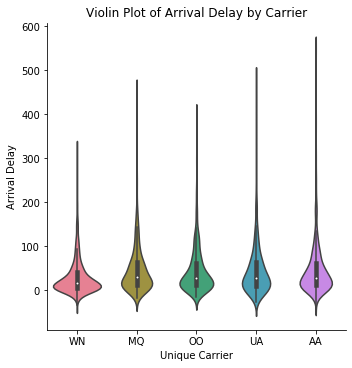

In [109]:
#violin plot
sns.catplot(x="UniqueCarrier", y="ArrDelay", kind="violin", data=top_flights, palette = "husl")
plt.xlabel("Unique Carrier")
plt.ylabel('Arrival Delay')
plt.title("Violin Plot of Arrival Delay by Carrier")
plt.show()

The violin plot is similar to the boxplot. It is even more clear from the violin plot that most of WN's delays were concentrated near 0. This chart format makes it more difficult to see where the values that fall outside of the main violin section fall.

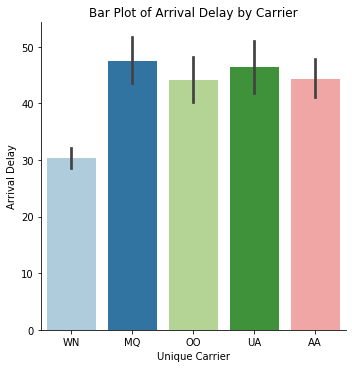

In [113]:
#bar plot
sns.catplot(x="UniqueCarrier", y="ArrDelay", kind="bar", data=top_flights, palette = "Paired")
plt.xlabel("Unique Carrier")
plt.ylabel('Arrival Delay')
plt.title("Bar Plot of Arrival Delay by Carrier")
plt.show()

This plot shows a more zoomed-in look at the arrival delays for each airline. It is again clear that WN has shorter delays than the other four airlines. You cannot see the outliers at all on this plot.

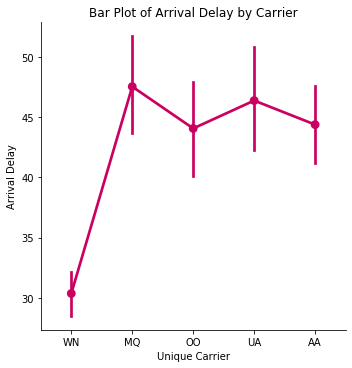

In [115]:
#point plot
sns.catplot(x="UniqueCarrier", y="ArrDelay", kind="point", data=top_flights, color = "#cb0162")
plt.xlabel("Unique Carrier")
plt.ylabel('Arrival Delay')
plt.title("Point Plot of Arrival Delay by Carrier")
plt.show()

This plot is very similar to the bar plot in that it clearly shows that WN has lower delays than the other airlines, but does not show the outliers at all. Since the carriers are not ranked, the connections between them are not meaningful and probably should not be there.

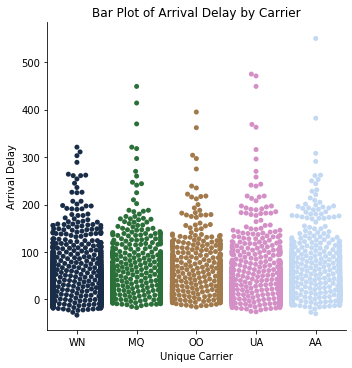

In [118]:
#swarm plot 
sns.catplot(x="UniqueCarrier", y="ArrDelay", kind="swarm",
            data=top_flights, palette = "cubehelix")
plt.xlabel("Unique Carrier")
plt.ylabel('Arrival Delay')
plt.title("Swarm Plot of Arrival Delay by Carrier")
plt.show()

This is not a good way to display this data. It is similar to the scatterplot, but shows the data as more spread out; however, there are too many data points in this data set for this approach to work well.

In [125]:
#load new data
weather = pd.read_csv('weatherdata.csv')
weather.head(20)

,precipitation,day,month,year,temperature,dewpoint,humidity,wind
0,1.00,1,8,2015,79,58,50,10
1,0.00,2,8,2015,78,54,52,11
2,0.00,3,8,2015,79,64,67,13
3,0.49,4,8,2015,78,66,68,9
4,0.00,5,8,2015,75,57,58,11
5,0.00,6,8,2015,74,53,51,9
6,0.00,7,8,2015,69,57,70,8
7,0.00,8,8,2015,69,57,68,6
8,0.00,9,8,2015,68,59,80,9
9,0.00,10,8,2015,73,59,67,10


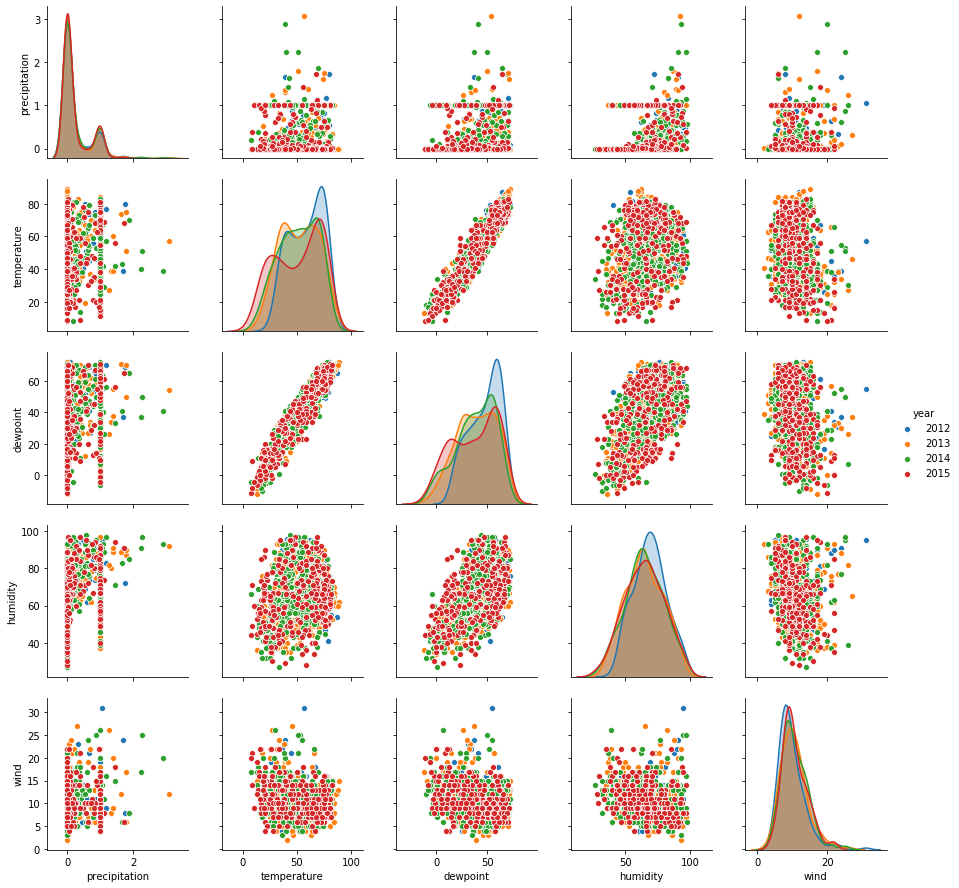

In [124]:
sns.pairplot(weather, hue = 'year', vars = ['precipitation', 'temperature', 'dewpoint', 'humidity', 'wind'])
plt.show()

This chart shows that there is a clear positive correlation between temperature and dewpoint, and somewhat of a positive correlation between humidity and dewpoint. Wind and precipitation, and to some extent humidity have shown similar patterns year after year, while the dewpoint and temperature distributions varied throughout the time in which the data was collected.